In [778]:
import scipy.stats as sps
import pandas as pd
import numpy as np

# Task3

In [153]:
train3 = pd.read_csv('./hw11t3v0_train.txt', '\t', header=None)
test3 = pd.read_csv('./hw11t3v0_test.txt', '\t', header=None)
target3 = pd.read_csv('./hw11t3v0_target.txt', '\t', header=None)


In [779]:
train3.head()

0       1       2      3      4      5      6
0  61.493  22.774 -31.684  1.864  0.716 -0.809 -0.511
1  60.472  35.267 -40.022  2.306 -3.104 -1.770 -2.169
2 -75.192  -3.148  21.730  1.021  4.874  0.138  2.262
3  -3.592 -31.405  22.565 -0.350 -0.155 -0.646 -3.618
4 -96.133  -2.158  26.496 -0.154  1.581  1.577  1.988

In [13]:
test3.head()

0       1       2      3      4      5      6
0 -71.330   2.211  17.034  1.842  1.858 -0.117  2.152
1 -63.588  -4.953  19.954  3.100 -1.069 -0.132  2.692
2  38.756  24.093 -26.677  0.372  0.641 -0.157 -0.010
3 -14.522 -33.612  26.929  3.177 -4.449 -0.561  1.284
4 -11.235 -34.898  26.959  0.665 -2.671 -0.199 -0.337

In [14]:
target3.head()

0
0  -79.404
1  -87.106
2 -458.711
3  100.090
4 -583.253

In [15]:
len(target3)

500

In [17]:
len(train3)

500

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, n_iter=200)

X_tsne = tsne.fit_transform(np.concatenate((train3, test3)))
X_train_tsne, X_test_tsne = X_tsne[:len(train3)], X_tsne[len(train3):]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

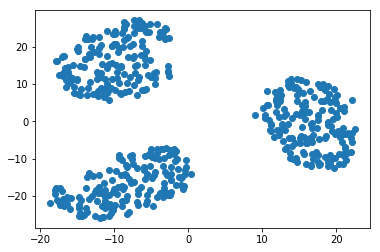

In [26]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

После применения T-SNE отчетливо видны 3 кластера

In [27]:
import seaborn as sns

Взглянем на попарные зависимости признаков

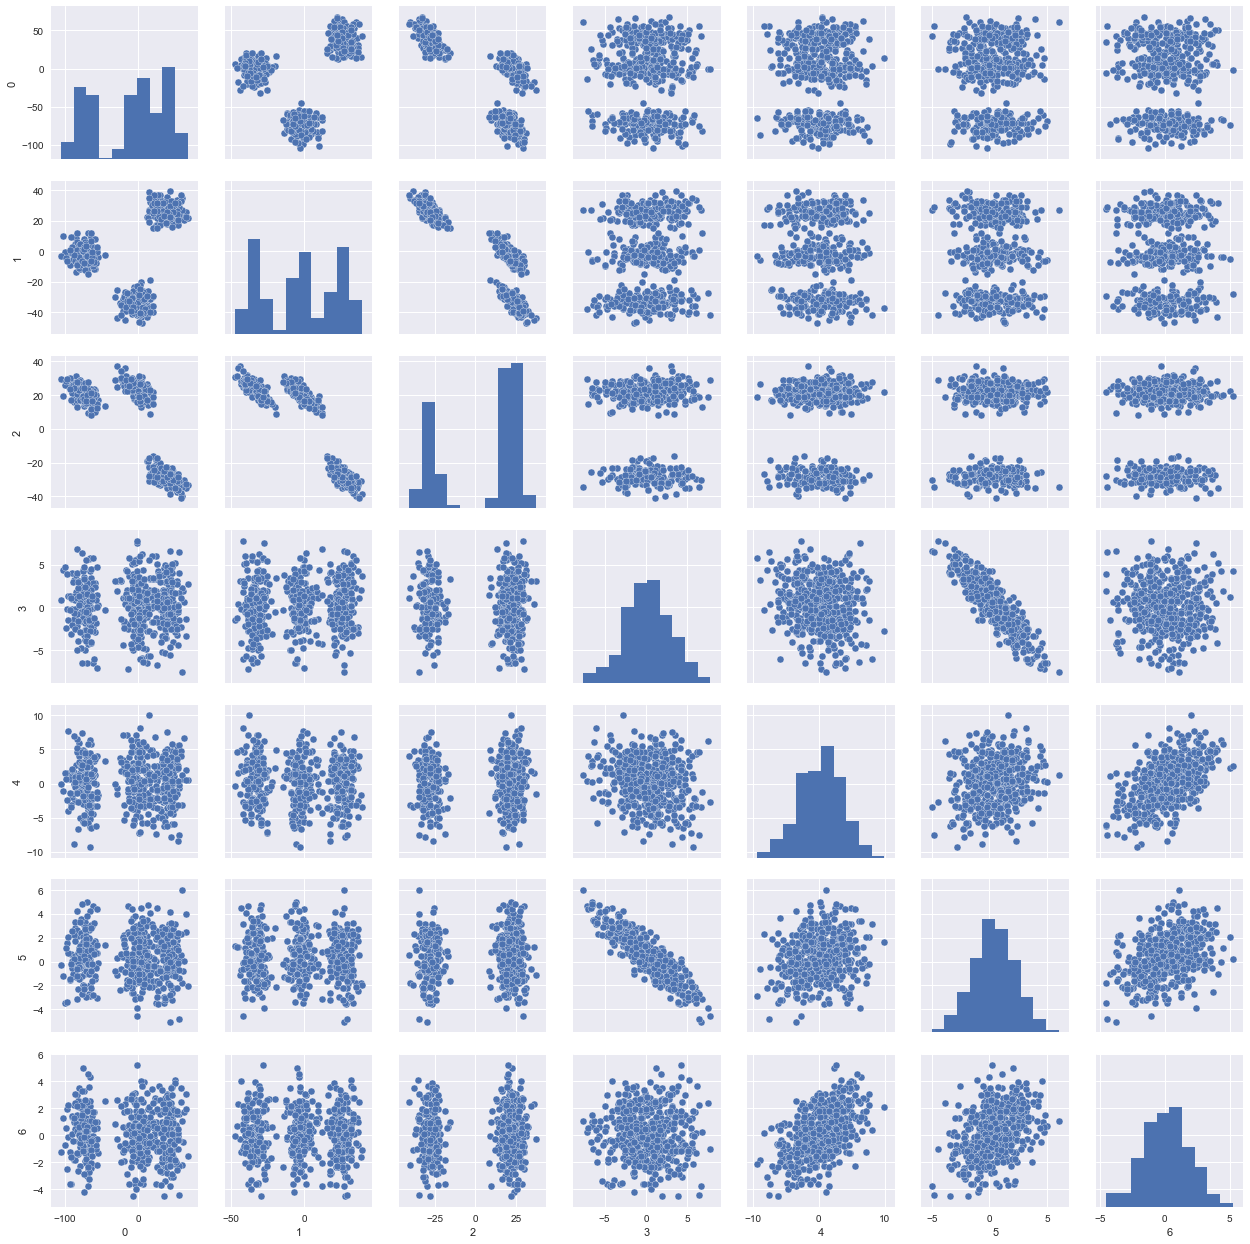

In [29]:
sns.pairplot(train3)

видно, что данные вообще линейно разделимы, если спроецировать на 2 признака

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train3, target3)

In [92]:
cross_val_score(estimator=LinearRegression(), X=train3, y=target3, scoring='mean_squared_error').mean()

-3249.294337623202

Получаем очень большую ошибку, скорее всего данные не линейные

Попробуем понизить размерность, кластеризовать там данные и внутри каждого кластера запустить свою линейную модель

In [780]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(np.concatenate((train3, test3)))
X_train_pca, X_test_pca = X_pca[:len(train3)], X_pca[len(train3):]

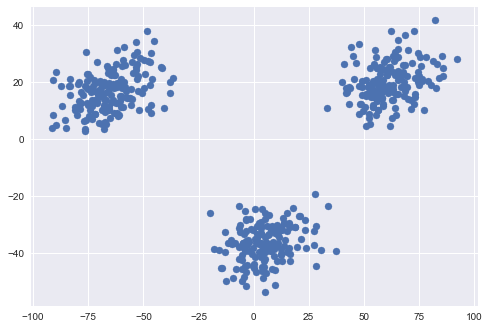

In [99]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])

PCA отработал очень хорошо

In [101]:
from sklearn.cluster import KMeans

In [102]:
kmen = KMeans(n_clusters=3)

In [103]:
kmen.fit(X_train_pca)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [104]:
kmen.labels_

array([0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0,
       1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0,
       2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       0, 1,

In [110]:
predicted_for_test = kmen.predict(X_test_pca)
predicted_for_test

array([1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1,
       2, 1, 1, 1], dtype=int32)

In [113]:
XX_tr, XX_te, yy_tr, yy_te = train_test_split(X_train_pca, target3)

In [114]:
def split_to_three(data, trgts):
    clus = kmen.predict(data)
    nol = data[clus == 0]
    odin = data[clus == 1]
    dva = data[clus == 2]
    tar_0 = trgts[clus == 0]
    tar_1 = trgts[clus == 1]
    tar_2 = trgts[clus == 2]
    return nol, odin, dva, tar_0, tar_1, tar_2

In [115]:
train_splitted = split_to_three(XX_tr, yy_tr)
test_splitted = split_to_three(XX_te, yy_te)

In [112]:
# train_0 = X_train_pca[kmen.labels_ == 0]
# train_1 = X_train_pca[kmen.labels_ == 1]
# train_2 = X_train_pca[kmen.labels_ == 2]
# #--------------------------------------#
# target_0 = target3[kmen.labels_ == 0]
# target_1 = target3[kmen.labels_ == 1]
# target_2 = target3[kmen.labels_ == 2]
# #--------------------------------------#
# test_0 = X_test_pca[predicted_for_test == 0]
# test_1 = X_test_pca[predicted_for_test == 1]
# test_2 = X_test_pca[predicted_for_test == 2]

In [117]:
lr = LinearRegression()

In [136]:
preds = []

In [137]:
lr.fit(train_splitted[0], train_splitted[3])
preds += list(lr.predict(test_splitted[0])[:,0])

In [139]:
lr.fit(train_splitted[1], train_splitted[4])
preds += list(lr.predict(test_splitted[1])[:,0])

In [140]:
lr.fit(train_splitted[2], train_splitted[5])
preds += list(lr.predict(test_splitted[2])[:,0])

In [141]:
len(preds)

125

In [143]:
len(XX_te)

125

In [107]:
len(train_0)

172

In [ ]:
y_tteeeeest = test_splitted[]

In [151]:
mean_squared_error(preds, np.concatenate(test_splitted[3:]))

71.623309201026117

Получили намного более вменяемое значение, нежели в самом начале!

In [781]:
preds[:10]

[-53.839236159807491,
 -38.434303294556173,
 -58.954994772090934,
 -43.608146099782481,
 -84.071014184801157,
 -61.755494825681573,
 -61.034684344794407,
 -54.466166526112211,
 -49.161351311794654,
 -57.087385109901199]

# Task4 то же самое, что и в предыдущем задании

In [154]:
train4 = pd.read_csv('./hw11t4v0_train.txt', '\t', header=None)
test4 = pd.read_csv('./hw11t4v0_test.txt', '\t', header=None)
target4 = pd.read_csv('./hw11t4v0_target.txt', '\t', header=None)

In [157]:
len(train4)

500

In [176]:
from sklearn.svm import SVR

In [182]:
cross_val_score(estimator=SVR(), X=train4, y=target4.values.ravel(), scoring='mean_squared_error').mean()

-361215.73056817154

Получаем просто гигантскую ошибку

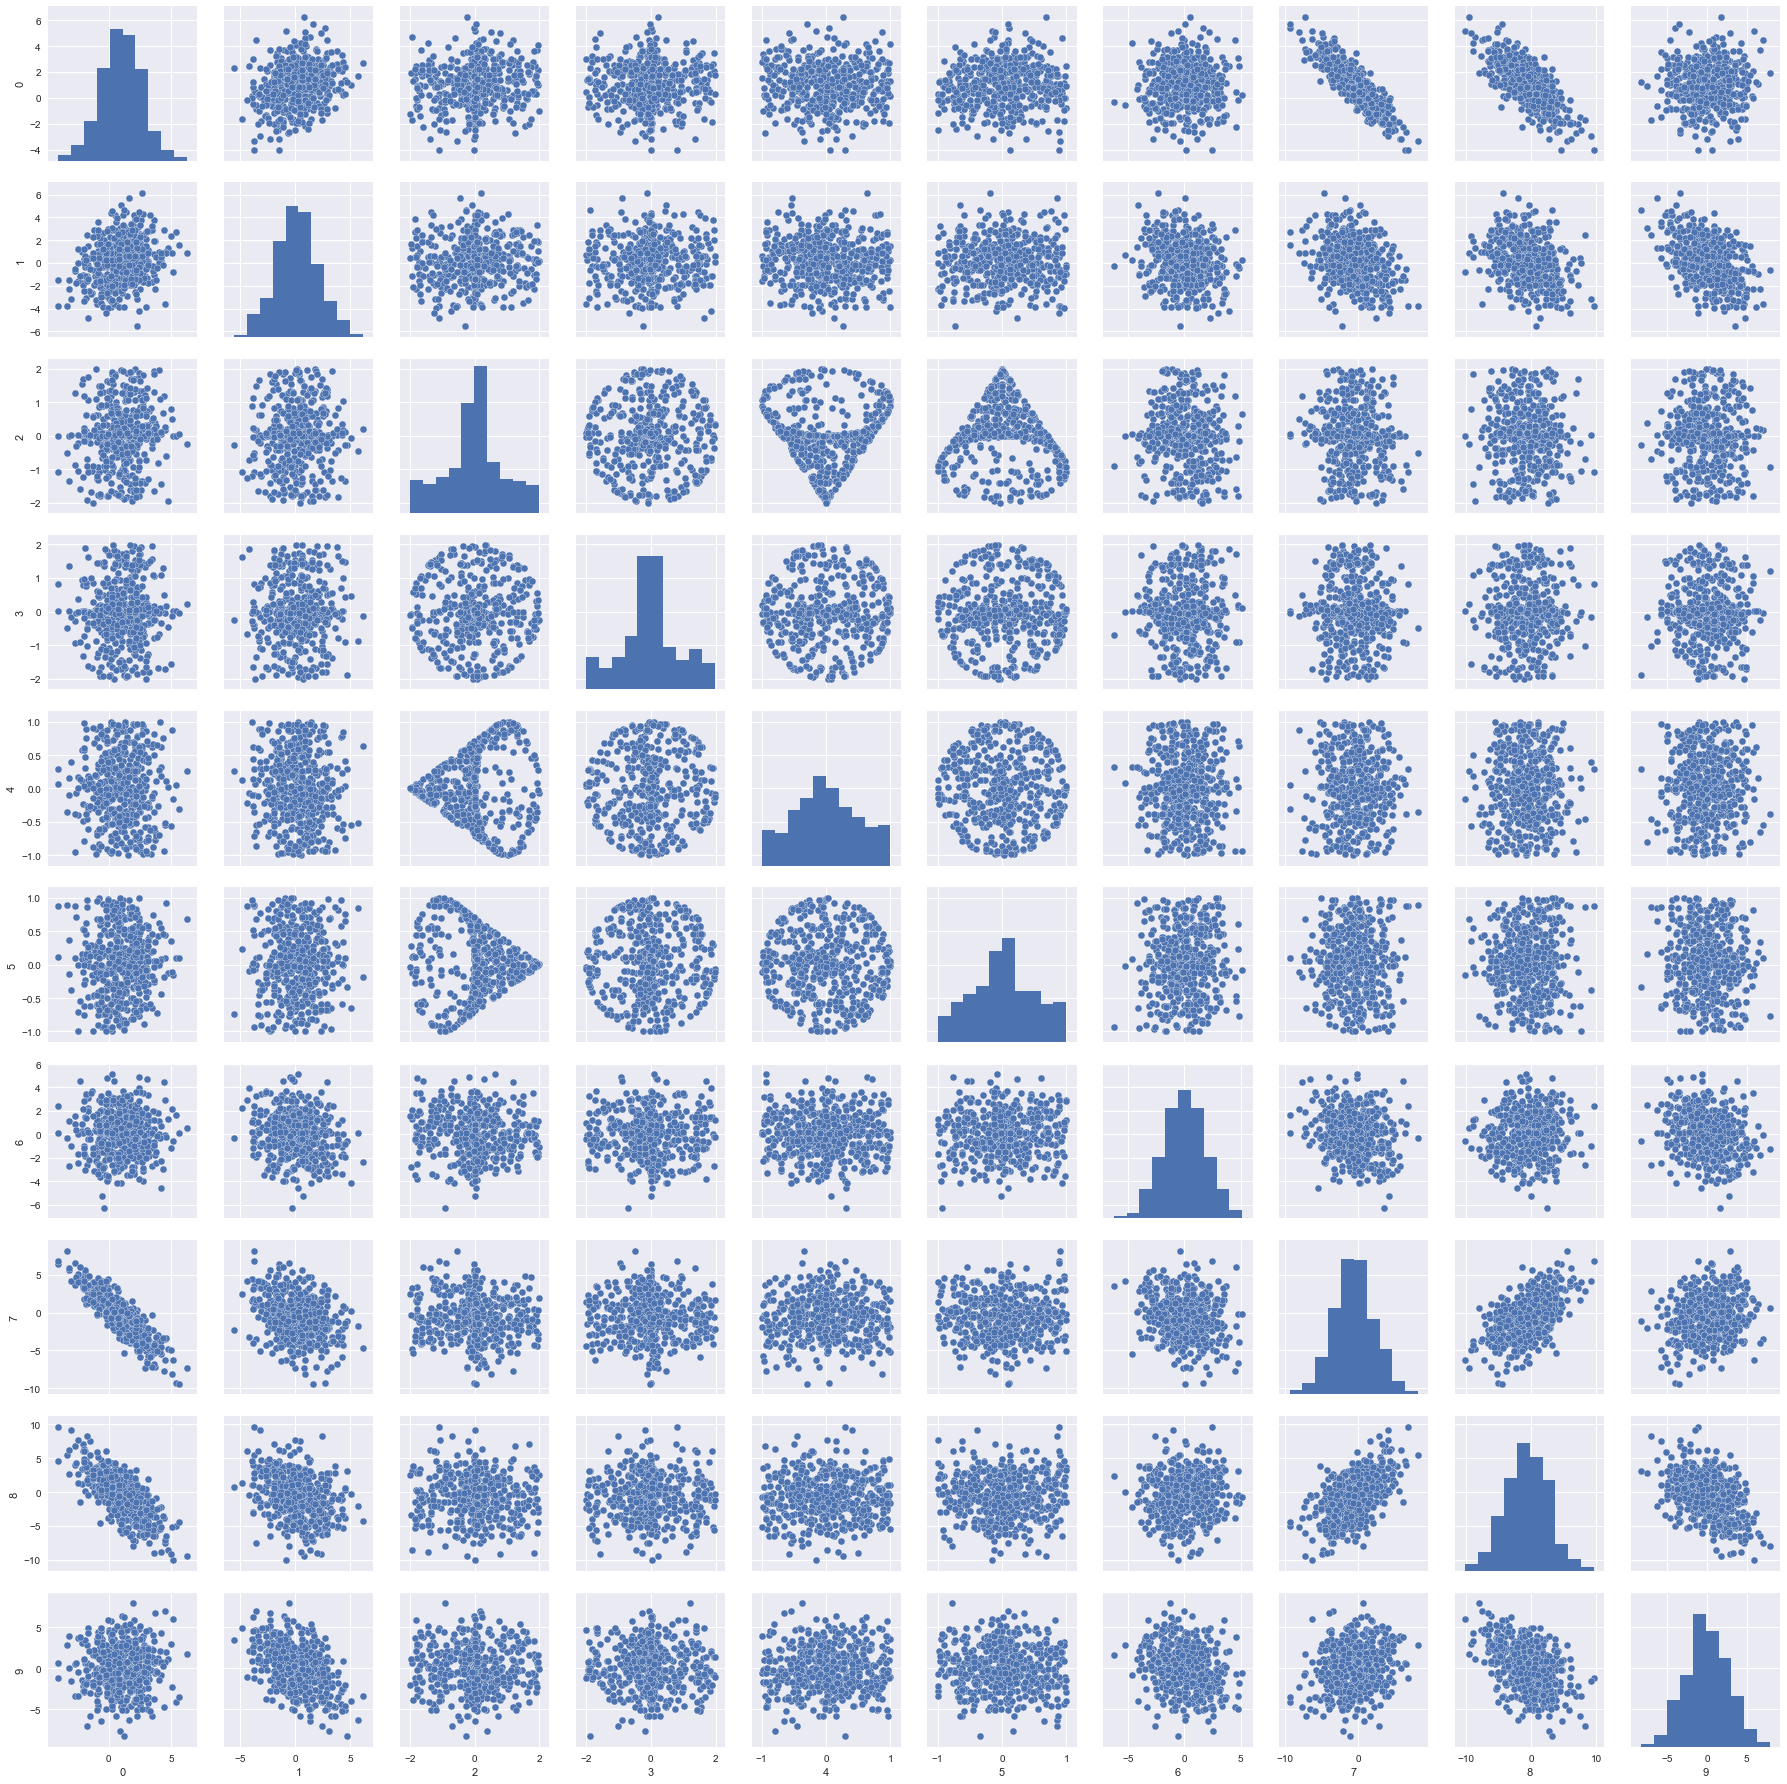

In [156]:
sns.pairplot(train4)

кажется, наши данные похожина обычный шум(


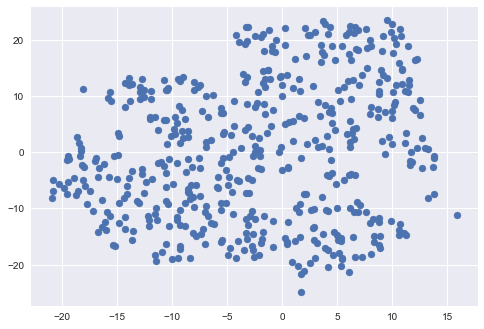

In [782]:
tsne = TSNE(n_components=2, n_iter=200)

X_tsne = tsne.fit_transform(np.concatenate((train4, test4)))
X_train_tsne, X_test_tsne = X_tsne[:len(train3)], X_tsne[len(train3):]
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

Как из pairplot-a, так и из результатов работы t-sne, не выходит получить нормальную визуализацию в двумерном пр-ве. 
Посмотрим, как работает линейная регрессия на исходных признаках, а далее попробуем уменьшить размерность

In [165]:
cross_val_score(estimator=LinearRegression(), X=train4, y=target4, scoring='mean_squared_error').mean()

-372146.59386070567

Воспользуемся Робастной Линейной Регрессией

In [166]:
cross_val_score(estimator=RANSACRegressor(LinearRegression()), X=train4, y=target4, scoring='mean_squared_error').mean()

-365065.35907338286

Тоже не помогла

In [163]:
target4[:10]

0
0    9.873
1   -1.530
2    8.508
3    6.963
4   49.940
5   -0.500
6  540.809
7  403.464
8   41.071
9   13.461

In [167]:
from sklearn.cluster import MeanShift

In [783]:
pca = PCA(n_components='mle')

X_pca = pca.fit_transform(np.concatenate((train4, test4)))
X_train_pca, X_test_pca = X_pca[:len(train4)], X_pca[len(train4):]

In [785]:
X_train_pca.shape

(500, 9)

Методом Максимальеного правдоподобия получается, что лучше вообще не выкидывать признаки

In [168]:
from tqdm import tqdm


Воспользуемся нами пройденной ядерной регрессией, быть может, она нам поможет

In [793]:
pca = TSNE(n_components=4)

X_pca = pca.fit_transform(np.concatenate((train4, test4)))
X_train_pca, X_test_pca = X_pca[:len(train4)], X_pca[len(train4):]
ansas.append(cross_val_score(estimator=kernel_regression.KernelRegression('sigmoid'), X=X_train_pca, y=target4.values.ravel(), scoring='mean_squared_error', cv=3))

In [794]:
ansas

[array([  -74497.33705325,   -89541.98093312,  -141144.91065609,
          -78572.59941934, -1406715.78713924]),
 array([ -1.33766695e+06,  -1.98651927e+06,  -5.43563285e+08]),
 array([-80039411.89098892, -45223608.30297051, -11035067.23371935])]

In [787]:
dims = range(2, 9)
ansas = []
for dim in tqdm(dims):
    pca = pca(n_components=dim)

    X_pca = pca.fit_transform(np.concatenate((train4, test4)))
    X_train_pca, X_test_pca = X_pca[:len(train4)], X_pca[len(train4):]
    ansas.append(cross_val_score(estimator=kernel_regression.KernelRegression(), X=X_train_pca, y=target4.values.ravel(), scoring='mean_squared_error', cv=5))

 14%|█▍        | 1/7 [00:02<00:14,  2.39s/it]/usr/local/lib/python3.6/site-packages/kernel_regression.py:84: RuntimeWarning: invalid value encountered in true_divide
  return (K * self.y[:, None]).sum(axis=0) / K.sum(axis=0)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [239]:
ansas

[array([  -55604.12893692,  -112289.91619638,  -168425.12668202,
          -82265.49715863, -1431944.03861944]),
 array([  -55323.63340705,   -79778.59355673,  -146824.15780479,
         -148337.28019332, -1385012.74557578]),
 array([  -57463.87608721,   -77123.19188435,  -141055.07322855,
          -75950.1320367 , -1442641.70404021]),
 array([  -58814.99680759,   -83301.15842256,  -141766.84609072,
          -73428.29858537, -1451160.26153275]),
 array([  -61782.49250037,   -82346.87966883,  -141480.78690932,
          -70118.06368102, -1463035.28643482]),
 array([  -61506.36850335,   -82511.12723661,  -142509.80962115,
          -69215.60737002, -1466009.96510083]),
 array([  -59560.01969514,   -79396.58486618,  -143076.52828576,
          -71366.68789475, -1467578.07286856])]

Cтало получше, но все же все очень плохо еще

In [229]:
import kernel_regression

In [230]:
qwe = kernel_regression.KernelRegression()

In [ ]:
qwe.fit(X_train_pca, )

In [201]:
len(X_train_pca)

500

In [231]:
cross_val_score(kernel_regression.KernelRegression(), X_train_pca, target4.values.ravel(), scoring='mean_squared_error')

array([ -78489.51576325, -160882.81273417, -929284.2929403 ])

Cтало лучше, может стоит взять другое число компонент?

In [213]:
XX_tr, XX_te, yy_tr, yy_te = train_test_split(X_train_pca, target4.values.ravel())

In [214]:
yy_tr.ravel().shape

(375,)

In [215]:
qwe.fit(XX_tr, yy_tr)

KernelRegression(gamma=None, kernel='rbf')

In [216]:
list(XX_te[0])

[4.0811149129003059, -5.7517575232752005]

In [217]:
len(qwe.predict(list(XX_te[0])))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


1

In [218]:
qwe.predict(list(XX_te[0]))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 21.33802497])

# Task 5

In [409]:
train5 = pd.read_csv('./hw11t5v3_train.txt', '\t', header=None)
test5 = pd.read_csv('./hw11t5v3_test.txt', '\t', header=None)
target5 = pd.read_csv('./hw11t5v3_target.txt', '\t', header=None)
target5_test = pd.read_csv('./hw11t5v3_target_test.txt', '\t', header=None)

In [410]:
train5.head()

0      1      2
0  0.895 -2.873  0.504
1  2.856  0.168  1.951
2 -0.576 -0.238 -0.437
3 -0.277  0.205 -0.218
4  3.494 -0.137  1.955

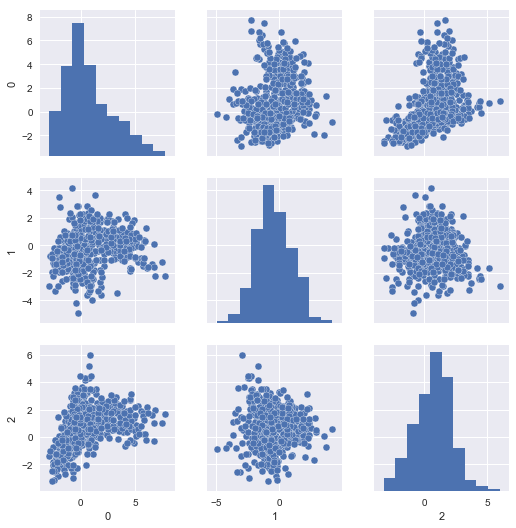

In [411]:
sns.pairplot(train5)

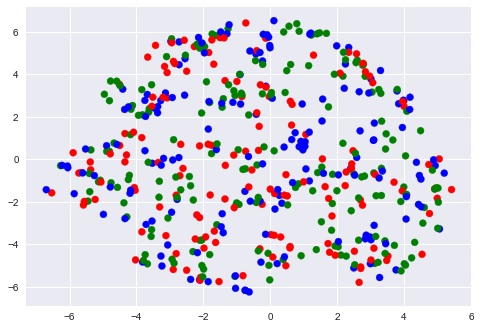

In [749]:
tsne = TSNE(n_components=2, n_iter=100000, learning_rate=50)

X_tsne = tsne.fit_transform(np.concatenate((train4, test4)))
X_train_tsne, X_test_tsne = X_tsne[:len(train3)], X_tsne[len(train3):]
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=[clrs[targ[0]] for targ in target5.values])

C виду сразу не понять, сколько тут будет кластеров, используем алго, окоторый сам определяет их число

In [750]:
ms = MeanShift()
ms_preds = ms.fit_predict(X_train_tsne)

In [751]:
ms_preds

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1,

Нарисуем новые кластера и в каждом из них запустим свой KNN

In [752]:
test_ms_preds = ms.predict(X_test_tsne)

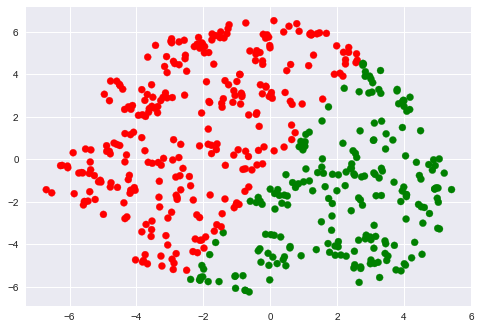

In [753]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=[clrs[targ + 1] for targ in ms_preds])

In [754]:
X_tr_0 = X_train_tsne[ms_preds == 0]
X_tr_1 = X_train_tsne[ms_preds == 1]
trgt_tr_0 = target5[ms_preds == 0].values.ravel()
trgt_tr_1 = target5[ms_preds == 1].values.ravel()
#-------------------------
X_te_0 = X_test_tsne[test_ms_preds == 0]
X_te_1 = X_test_tsne[test_ms_preds == 1]
trgt_te_0 = target5_test[test_ms_preds == 0].values.ravel()
trgt_te_1 = target5_test[test_ms_preds == 1].values.ravel()

In [761]:
knn_0 = KNeighborsClassifier(2)
knn_0.fit(X_tr_0, trgt_tr_0)
knn_1 = KNeighborsClassifier(2)
knn_1.fit(X_tr_1, trgt_tr_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [762]:
preds_0 = knn_0.predict(X_te_0)
preds_1 = knn_1.predict(X_te_1)

In [763]:
accuracy_score(np.concatenate((preds_0, preds_1)), np.concatenate((trgt_te_0, trgt_te_1)))

0.46000000000000002

T-SNE дает более-менее результат, воспользуемся PCA и проделаем для него то же самое

In [768]:
pca = PCA(n_components='mle')

X_pca = pca.fit_transform(np.concatenate((train5, test5)))
X_train_pca, X_test_pca = X_pca[:len(train5)], X_pca[len(train5):]

In [769]:
clrs = {1:'red', 2:'green', 3:'blue'}

In [770]:
colorrrs = [clrs]

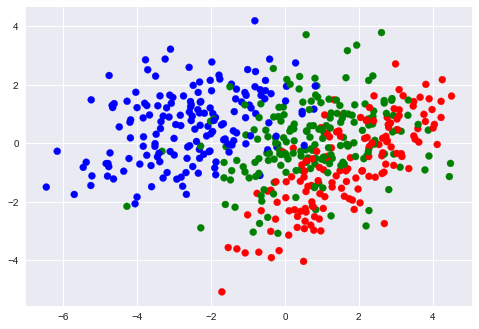

In [777]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=[clrs[targ[0]] for targ in target5.values])

In [772]:
ms = MeanShift()
ms_preds = ms.fit_predict(X_train_pca)

In [774]:
len(np.unique(ms_preds))

1

Всего один кластер

In [278]:
from sklearn.metrics import accuracy_score

In [775]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, target5.values.ravel())
predictions_knn_pca = knn_pca.predict(X_test_pca)

In [776]:
accuracy_score(predictions_knn_pca, target5_test.values.ravel())

0.64000000000000001

# Task6

In [526]:
from sklearn.datasets import fetch_olivetti_faces

In [546]:
dataset = fetch_olivetti_faces()
faces = dataset.images

In [540]:
faces[0]

array([ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
        0.16115703,  0.1570248 ], dtype=float32)

In [545]:
dataset.images[0].shape

(64, 64)

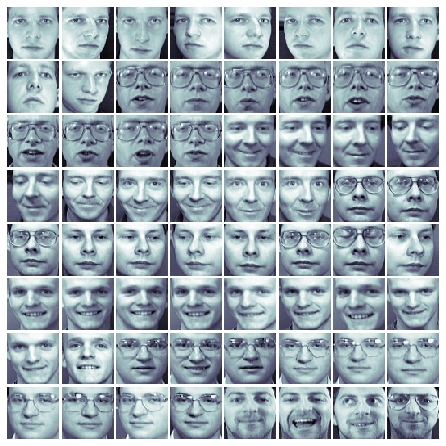

In [550]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
  
# plot the faces: each image is 64x64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces[i], cmap=plt.cm.bone)

In [537]:
len((faces['data'])[0])

4096

In [553]:
X,y=dataset.data, dataset.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)

(400, 64)


Вот так выглядят данные 8х8

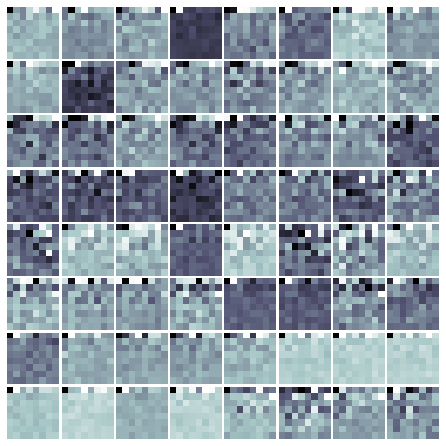

In [562]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
  
# plot the faces: each image is 64x64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_proj[i].reshape((8,8)), cmap=plt.cm.bone)

In [554]:
print(np.cumsum(pca_oliv.explained_variance_ratio_))

[ 0.23812743  0.37806708  0.45775321  0.50773644  0.54383487  0.57540423
  0.59967256  0.62003654  0.63961768  0.65633893  0.67229116  0.68666095
  0.69912833  0.71059966  0.72122842  0.73100561  0.74019623  0.74835199
  0.75589073  0.76336056  0.77034634  0.77649266  0.78233194  0.78802919
  0.79349113  0.79880971  0.80394787  0.80890626  0.81348288  0.8178947
  0.82191473  0.82575661  0.8293761   0.83272153  0.83592534  0.83908576
  0.84213722  0.84512359  0.84794497  0.85068506  0.85328281  0.85582274
  0.8582682   0.86066657  0.86297548  0.86523968  0.86746252  0.86966693
  0.87175614  0.87380594  0.87577438  0.87768877  0.87953925  0.88132864
  0.88310474  0.88482958  0.88651544  0.88815713  0.88977599  0.89135993
  0.89291424  0.89443654  0.89593613  0.89741325]


In [555]:
len(pca_oliv.explained_variance_ratio_)

64

Круто, сжав в 64 раза изображения сохряняется почти 90% дисперсии

Посмотрим на 8 главных компонент, как они выглядят

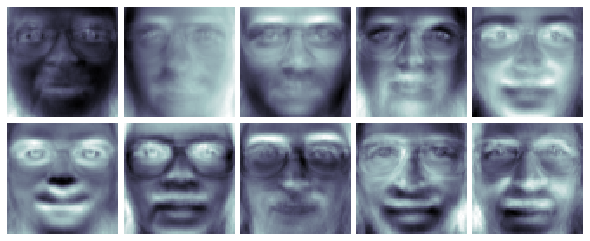

In [557]:
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

А теперь перейдем от 8х8 обратно в 64х64

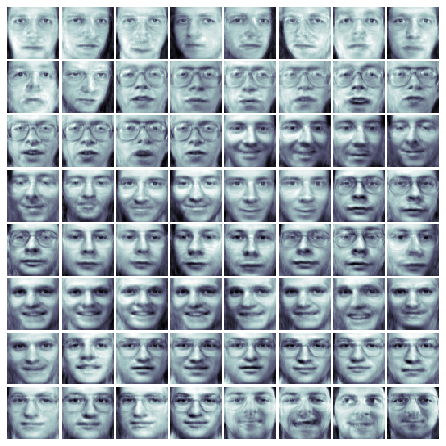

In [563]:
X_inv_proj = pca_oliv.inverse_transform(X_proj) 
X_proj_img = np.reshape(X_inv_proj,(400,64,64))
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

In [566]:
pca_oliv.components_.shape

(64, 4096)

In [ ]:
faces[0].dot(pca_oliv.components_)

In [630]:
def draw_projected(rooted):
    X,y=dataset.data, dataset.target
    pca_oliv = PCA(n_components=rooted ** 2)
    X_proj = pca_oliv.fit_transform(X)
    print(X_proj.shape)
    # set up the figure
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the faces: each image is 64x64 pixels
    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(X_proj[i].reshape((rooted,rooted)), cmap=plt.cm.bone)

In [625]:
datka[0].shape

(4096,)

In [626]:
ooo = PCA(n_components=4096)

In [627]:
prj = ooo.fit_transform(datka)

In [628]:
ooo.components_.shape

(400, 4096)

In [629]:
prj.shape

(400, 400)

In [604]:
np.sqrt(4096)

64.0

(400, 400)


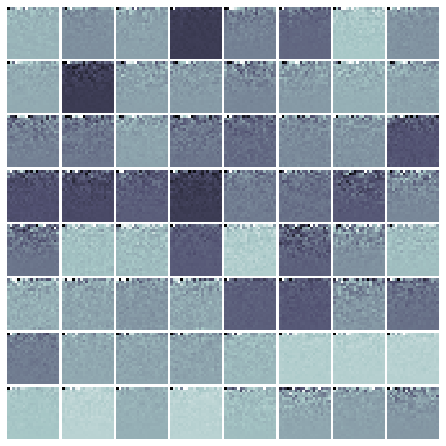

In [658]:
draw_projected(20)

Теперь применим T-SNE и PCA для размерности 2 и посмотрим, появились ли кластера

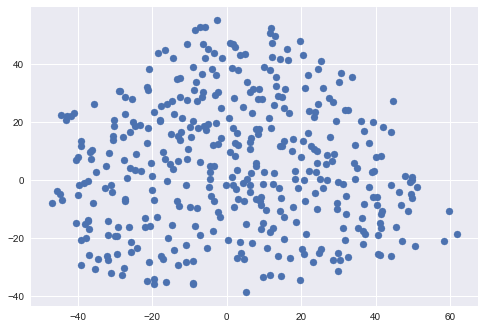

In [656]:
tsne = TSNE(n_components=2, n_iter=10000)

X_tsne = tsne.fit_transform(datka)
plt.scatter(X_tsne[:,0], X_tsne[:,1])

In [675]:
ac = AgglomerativeClustering()
clustered_tsne = ac.fit_predict(X_tsne)

In [676]:
clustered_tsne

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

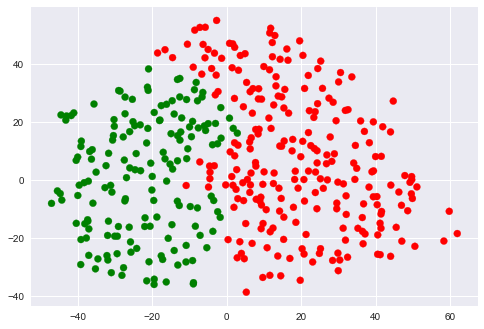

In [678]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=[clrs[elem + 1] for elem in clustered_tsne])

Вот что дал нам T-SNE, вовсе тяжело найти тут какие-либо кластера

Взглянем, что нам дает PCA

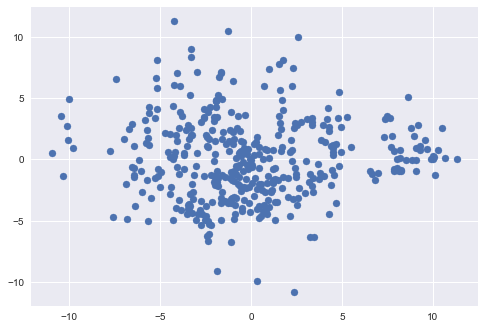

In [659]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(datka)
plt.scatter(X_pca[:,0], X_pca[:,1])

In [665]:
from sklearn.cluster import AgglomerativeClustering

In [672]:
ac = AgglomerativeClustering(3)
clustered_pca = ac.fit_predict(X_pca)

In [673]:
clustered_pca

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0,

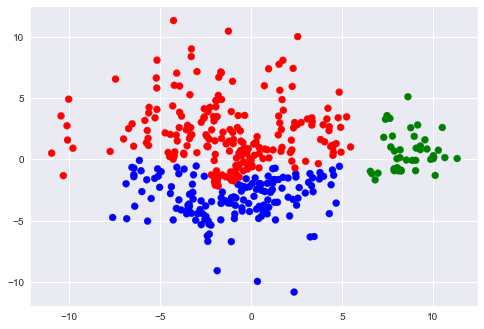

In [674]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=[clrs[elem + 1] for elem in clustered_pca])

В случае с PCA получилось более-менее отделить кластера. Мы смотрели ранее на главные 8 компонент, например, и они хорошо были похожи на те лица, а их можно разделить на кластера